In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.linear_model
import seaborn as sb
import statsmodels.api as sm
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [114]:
#Read file
search = pd.read_csv('Search data.csv')
display = pd.read_csv('display data.csv')
video = pd.read_csv('video data.csv')

In [3]:
def ExploratoryAnalysis(data):
    print "first 5 rows: \n" + str(data.head(5)) + "\n\n"
    print "statistical summary of data: \n\n" + str(data.describe()) + "\n\n"
    print "correlation: \n\n" + str(data.corr()) +"\n\n"
    columns = data.columns
    for i in range(0,len(columns)):
        print "columns " + str(columns[i]) + " has distinct values: \n" + str((data[columns[i]].value_counts())) + "\n\n"
    
    print "Pivot table: \n" +    str(pd.pivot_table(data, index = 'Month', aggfunc = np.sum)) + '\n\n'
    print "Graph: number of clicks distributed by Month \n" +  str(sb.factorplot( x='Month', y='Clicks', data=data, kind='bar')) + "\n\n"
    print "Graph: spend distributed by Month \n" +  str(sb.factorplot( x='Month', y='Cost', data=data, kind='bar', estimator = sum)) + "\n\n"

first 5 rows: 
     Date  Month  Year   Device Channel Campaign Type Media Type  Region  \
0  1/1/13      1  2013  Desktop  Google   Remarketing    Display  Global   
1  1/1/13      1  2013   Mobile  Google         Reach    Display  Global   
2  1/1/13      1  2013   Tablet  Google         Reach    Display  Global   
3  1/2/13      1  2013   Mobile  Google         Reach    Display  EMEA     
4  1/2/13      1  2013   Tablet  Google   Remarketing    Display  Global   

     Targeting     Cost  Clicks  
0  Remarketing  1074.74    3752  
1        Reach   845.78    1050  
2        Reach   420.80     350  
3        Reach    88.40     136  
4  Remarketing    17.06      82  


statistical summary of data: 

              Month          Year          Cost         Clicks
count  40804.000000  40804.000000  40804.000000   40804.000000
mean       6.455249   2014.667900    446.403717     967.888589
std        3.304922      1.072989   1041.130610    7847.806165
min        1.000000   2013.000000      

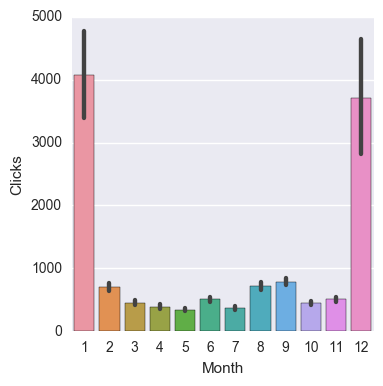

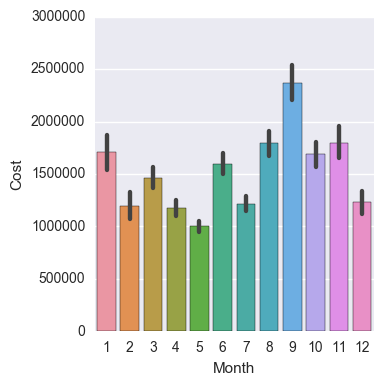

In [4]:
ExploratoryAnalysis(display)

first 5 rows: 
     Date  Month  Year   Device Channel Campaign Type Media Type  Region  \
0  1/1/13      1  2013  Desktop  Google        Legacy     Search  Global   
1  1/1/13      1  2013   Mobile  Google        Legacy     Search   LATAM   
2  1/1/13      1  2013   Tablet  Google        Legacy     Search     AMS   
3  1/1/13      1  2013   Tablet  Google        Legacy     Search  Global   
4  1/2/13      1  2013   Mobile  Google        Legacy     Search    EMEA   

  Targeting   Cost  Clicks  
0     Brand  90.64      62  
1        NB   7.20       4  
2        NB  86.32      28  
3     Brand   9.26       6  
4        NB   1.90       6  


statistical summary of data: 

              Month          Year          Cost        Clicks
count  49835.000000  49835.000000  49835.000000  49835.000000
mean       6.786134   2014.795284    744.762220    119.749253
std        3.442085      1.080345   1888.371941    387.852678
min        1.000000   2013.000000      0.000000      2.000000
25%        

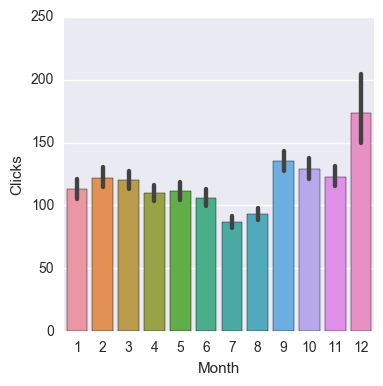

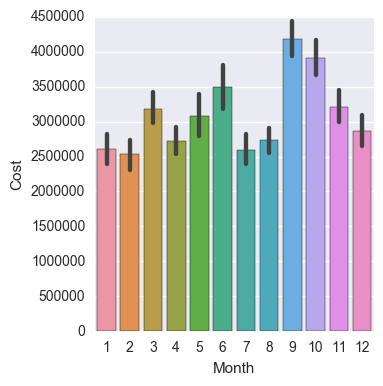

In [5]:
ExploratoryAnalysis(search)

first 5 rows: 
      Date  Month  Year   Device  Channel Campaign Type Media Type  Region  \
0  6/16/13      6  2013   Tablet  Youtube         Reach      Video  Global   
1  6/27/13      6  2013  Desktop  Youtube         Reach      Video  Global   
2  6/27/13      6  2013   Mobile  Youtube         Reach      Video  Global   
3  6/28/13      6  2013  Desktop  Youtube         Reach      Video  Global   
4  6/28/13      6  2013   Mobile  Youtube         Reach      Video  Global   

  Targeting     Cost  Clicks  
0     Reach     0.20       2  
1     Reach    16.84      14  
2     Reach  1407.02     660  
3     Reach   973.28    1046  
4     Reach  2600.04     568  


statistical summary of data: 

             Month         Year         Cost       Clicks
count  1644.000000  1644.000000  1644.000000  1644.000000
mean      7.214112  2015.189173   179.711861    55.930657
std       2.943021     1.137040   554.098341   164.277759
min       1.000000  2013.000000     0.000000     2.000000
25%    

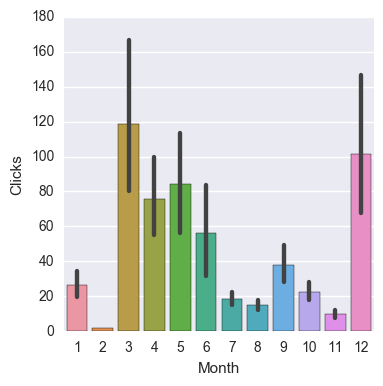

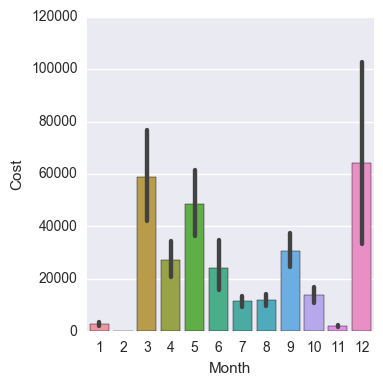

In [6]:

ExploratoryAnalysis(video)

(array([  4.06940000e+04,   4.40000000e+01,   2.30000000e+01,
          1.80000000e+01,   4.00000000e+00,   8.00000000e+00,
          5.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          2.00000000e+00]),
 array([  2.00000000e+00,   3.93620000e+04,   7.87220000e+04,
          1.18082000e+05,   1.57442000e+05,   1.96802000e+05,
          2.36162000e+05,   2.75522000e+05,   3.14882000e+05,
          3.54242000e+05,   3.93602000e+05]),
 <a list of 10 Patch objects>)

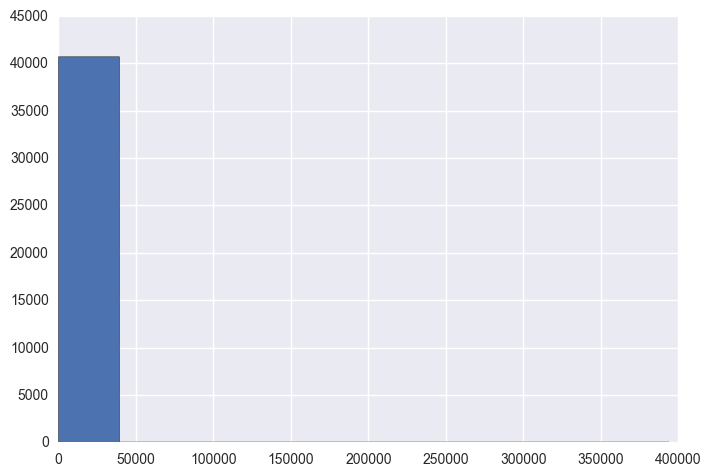

In [7]:
plt.hist(display.Clicks)

(array([  4.97840000e+04,   3.60000000e+01,   3.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.00000000e+00]),
 array([  2.00000000e+00,   2.82080000e+03,   5.63960000e+03,
          8.45840000e+03,   1.12772000e+04,   1.40960000e+04,
          1.69148000e+04,   1.97336000e+04,   2.25524000e+04,
          2.53712000e+04,   2.81900000e+04]),
 <a list of 10 Patch objects>)

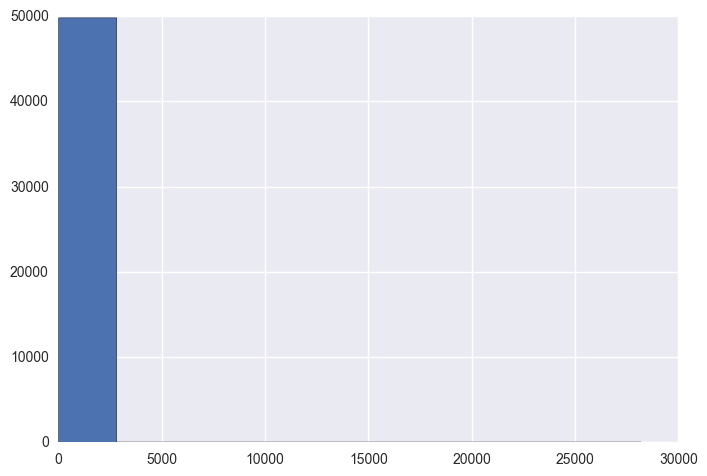

In [8]:
plt.hist(search.Clicks)

(array([  1.54700000e+03,   5.40000000e+01,   2.00000000e+01,
          1.30000000e+01,   4.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00]),
 array([  2.00000000e+00,   2.33400000e+02,   4.64800000e+02,
          6.96200000e+02,   9.27600000e+02,   1.15900000e+03,
          1.39040000e+03,   1.62180000e+03,   1.85320000e+03,
          2.08460000e+03,   2.31600000e+03]),
 <a list of 10 Patch objects>)

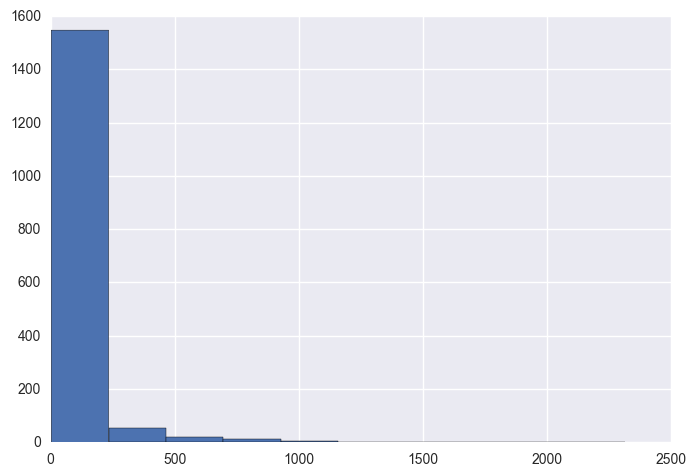

In [9]:
plt.hist(video.Clicks)

In [115]:
    display = display.join(pd.get_dummies(display['Device'],prefix="Device"))
    display = display.join(pd.get_dummies(display['Targeting'],prefix="Targeting"))
    display = display.join(pd.get_dummies(display['Region'],prefix="Region"))
    display = display.join(pd.get_dummies(display['Channel'],prefix="Channel"))
    display = display.join(pd.get_dummies(display['Campaign Type'],prefix="Campaign Type"))
    display = display.join(pd.get_dummies(display['Month'],prefix="Month"))
    display = display.join(pd.get_dummies(display['Year'],prefix="Year"))

In [116]:
    video = video.join(pd.get_dummies(video['Device'],prefix="Device"))
    video = video.join(pd.get_dummies(video['Targeting'],prefix="Targeting"))
    video = video.join(pd.get_dummies(video['Region'],prefix="Region"))
    video = video.join(pd.get_dummies(video['Channel'],prefix="Channel"))
    video = video.join(pd.get_dummies(video['Campaign Type'],prefix="Campaign Type"))
    video = video.join(pd.get_dummies(video['Month'],prefix="Month"))
    video = video.join(pd.get_dummies(video['Year'],prefix="Year"))

In [117]:
    search = search.join(pd.get_dummies(search['Device'],prefix="Device"))
    search = search.join(pd.get_dummies(search['Targeting'],prefix="Targeting"))
    search = search.join(pd.get_dummies(search['Region'],prefix="Region"))
    search = search.join(pd.get_dummies(search['Channel'],prefix="Channel"))
    search = search.join(pd.get_dummies(search['Campaign Type'],prefix="Campaign Type"))
    search = search.join(pd.get_dummies(search['Month'],prefix="Month"))
    search = search.join(pd.get_dummies(search['Year'],prefix="Year"))

In [118]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

def LinearRegressionResult(data):
    X = data.drop(['Year','Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    y = np.log(data["Clicks"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    model = sm.OLS(y_train, X_train)
    results = model.fit()
    print 'MSE: ' + str(metrics.mean_squared_error(y_test,results.predict(X_test)))
    print(results.summary())
    

In [119]:
LinearRegressionResult(display)

MSE: 1.9176553083
                            OLS Regression Results                            
Dep. Variable:                 Clicks   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     971.8
Date:                Tue, 29 Nov 2016   Prob (F-statistic):               0.00
Time:                        02:23:55   Log-Likelihood:                -56522.
No. Observations:               32643   AIC:                         1.131e+05
Df Residuals:                   32605   BIC:                         1.134e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------

In [120]:
LinearRegressionResult(search)

MSE: 1.18518869214
                            OLS Regression Results                            
Dep. Variable:                 Clicks   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     1977.
Date:                Tue, 29 Nov 2016   Prob (F-statistic):               0.00
Time:                        02:23:56   Log-Likelihood:                -60260.
No. Observations:               39868   AIC:                         1.206e+05
Df Residuals:                   39834   BIC:                         1.209e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Cos

In [121]:
LinearRegressionResult(video)

MSE: 1.00345497821
                            OLS Regression Results                            
Dep. Variable:                 Clicks   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     92.12
Date:                Tue, 29 Nov 2016   Prob (F-statistic):          5.95e-246
Time:                        02:23:56   Log-Likelihood:                -1811.6
No. Observations:                1315   AIC:                             3669.
Df Residuals:                    1292   BIC:                             3788.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Cos

In [126]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

def DecisionTree(data):
    X = data.drop(['Year','Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    y = np.log(data["Clicks"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    print 'MSE: ' + str(metrics.mean_squared_error(y_test,dt.predict(X_test)))
    print 'accuracy = ' + str(dt.score(X_test,y_test))
    feature_importances_array = dt.feature_importances_

    # Put the features themselves in a list
    features_array = X.columns.values 

    # Turn these into a Data Frame
    feature_importances_df = pd.DataFrame({'importances' : feature_importances_array, 'features' : features_array})
    
#     print feature_importances_df.sort(columns='importances', ascending=False)
    return dt

In [127]:
def DT_predict(data):
    dt = DecisionTree(data)
    X = data.drop(['Year','Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    test_data = X[X['Month_12'] == 1]
    test_data['predicted_clicks'] = np.exp(dt.predict(test_data))
    print 'actual CPC: ' + str(data[data['Month'] == 12]['Cost'].sum()/data[data['Month'] == 12]['Clicks'].sum())
    print 'predict CPC: ' + str(test_data['Cost'].sum()/test_data['predicted_clicks'].sum())

In [128]:
DT_predict(display)

MSE: 0.230278567098
accuracy = 0.94173718552
actual CPC: 0.145915385398
predict CPC: 0.145873392404


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [129]:
DT_predict(search)

MSE: 0.283422577163
accuracy = 0.909854938267
actual CPC: 3.31646463174
predict CPC: 3.43392644592


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [130]:
DT_predict(video)

MSE: 0.377433657083
accuracy = 0.861630223418
actual CPC: 3.65036467236
predict CPC: 3.5890140056


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

def RandomForest(data):
#     data['Cost'] = np.log(data["Cost"])
    X = data.drop(['Year','Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    y = np.log(data["Clicks"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
#     data['predict_clicks'] = rf.predict(X_test)
    print 'MSE: ' + str(metrics.mean_squared_error(y_test,rf.predict(X_test)))
    print 'accuracy = ' + str(rf.score(X_test,y_test))    
    feature_importances_array = rf.feature_importances_

    # Put the features themselves in a list
    features_array = X.columns.values 

    # Turn these into a Data Frame
    feature_importances_df = pd.DataFrame({'importances' : feature_importances_array, 'features' : features_array})
    
    print feature_importances_df.sort(columns='importances', ascending=False)
    return rf

In [143]:
def RF_predict(data):
    rf = RandomForest(data)
    X = data.drop(['Year','Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    test_data = X[(X['Month_12'] == 1) & (X['Year_2015'] == 1)]
    test_data['predicted_clicks'] = np.exp(rf.predict(test_data))
    print 'actual Clicks: ' + str(data[(data['Month'] == 12) & (data['Year'] == 2015)]['Clicks'].sum())
    print 'predict Clicks: ' + str(test_data['predicted_clicks'].sum())
    print 'differences: ' + str((test_data['predicted_clicks'].sum() - data[(data['Month'] == 12) & (data['Year'] == 2015)]['Clicks'].sum())*100/data[(data['Month'] == 12) & (data['Year'] == 2015)]['Clicks'].sum()) + '%'
    print 'Cost: ' + str(data[(data['Month'] == 12) & (data['Year'] == 2015)]['Cost'].sum())
    print 'actual CPC: ' + str(data[(data['Month'] == 12) & (data['Year'] == 2015)]['Cost'].sum()/data[(data['Month'] == 12) & (data['Year'] == 2015)]['Clicks'].sum())
    print 'predict CPC: ' + str(test_data['Cost'].sum()/test_data['predicted_clicks'].sum())

In [144]:
RF_predict(display)

MSE: 0.142533289735
accuracy = 0.963937631184
                             features  importances
0                                Cost     0.766925
6                     Targeting_Reach     0.067212
2                       Device_Mobile     0.018393
22        Campaign Type_Reach - Image     0.013779
28                            Month_1     0.010504
1                      Device_Desktop     0.009070
14                       Region_LATAM     0.008484
43                          Year_2016     0.008188
41                          Year_2014     0.007863
21                Campaign Type_Reach     0.006777
29                            Month_2     0.006596
40                          Year_2013     0.006333
42                          Year_2015     0.006330
13                      Region_Global     0.005761
8                          Region_AMS     0.004934
23         Campaign Type_Reach - Text     0.004868
11                        Region_EMEA     0.003808
39                           Month_1

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [145]:
RF_predict(video)

MSE: 0.268393854615
accuracy = 0.901604965529
                     features  importances
0                        Cost     0.646198
10              Region_Global     0.075277
7                  Region_AMS     0.045028
14        Campaign Type_Video     0.032479
1              Device_Desktop     0.028596
8                 Region_APAC     0.026403
18                    Month_4     0.025852
3               Device_Tablet     0.017892
19                    Month_5     0.012679
17                    Month_3     0.011767
5             Targeting_Reach     0.010465
9                 Region_EMEA     0.010112
29                  Year_2015     0.009404
2               Device_Mobile     0.007563
26                   Month_12     0.007108
23                    Month_9     0.005237
24                   Month_10     0.004323
22                    Month_8     0.003319
21                    Month_7     0.002805
15                    Month_1     0.002788
28                  Year_2014     0.002708
30      

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [146]:
RF_predict(search)

MSE: 0.181727482235
accuracy = 0.942199964207
                     features  importances
0                        Cost     0.815318
3               Device_Tablet     0.018170
5             Targeting_Brand     0.016208
10                 Region_AMS     0.015362
39                  Year_2013     0.012622
18        Campaign Type_Alpha     0.011718
14               Region_LATAM     0.008883
6                Targeting_NB     0.008187
19         Campaign Type_Beta     0.006873
2               Device_Mobile     0.006164
22        Campaign Type_Gamma     0.005603
12                Region_EMEA     0.005400
1              Device_Desktop     0.005379
13              Region_Global     0.005047
41                  Year_2015     0.004889
11                Region_APAC     0.004795
23       Campaign Type_Legacy     0.003622
9            Targeting_Search     0.003372
40                  Year_2014     0.003292
16             Channel_Google     0.002988
27                    Month_1     0.002935
21      

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
